<center style="font-size: 30px;">Lab2</center>

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import trim_mean

print(':)')

:)


In [57]:
df = pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
df.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [58]:
df.rename(columns={
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': "Naive_Bayes_1",
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': "Naive_Bayes_2"
}, inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


1. Clean the dataset from outliers, rows that do not contain values. 

In [59]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_1               0
Naive_Bayes_2               0
dtype: int64

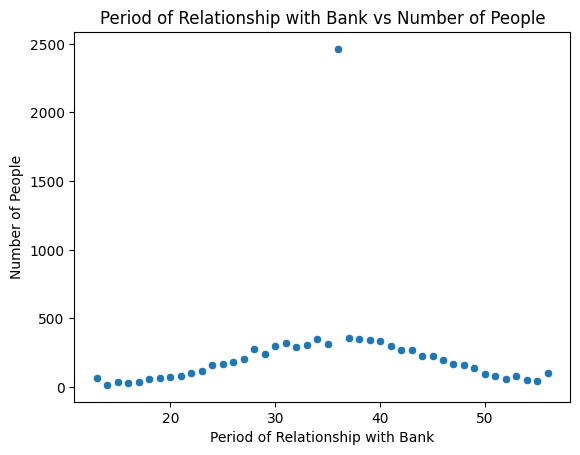

In [60]:
df_grouped = df.groupby('Months_on_book').size().reset_index(name='count')

sns.scatterplot(x='Months_on_book', y='count', data=df_grouped)

plt.xlabel('Period of Relationship with Bank')
plt.ylabel('Number of People')
plt.title('Period of Relationship with Bank vs Number of People')

# Show the plot
plt.show()

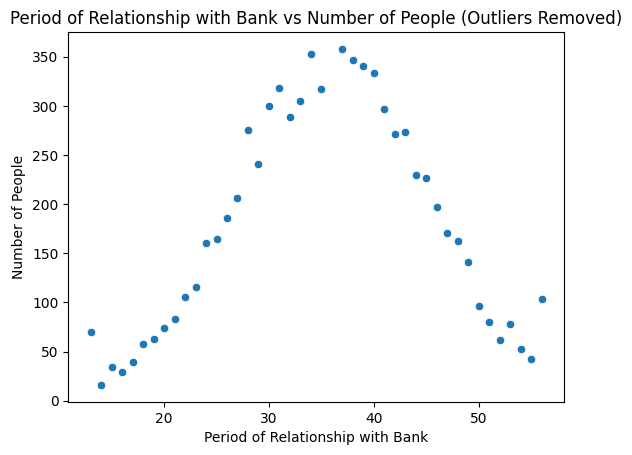

In [61]:
Q1 = df_grouped['count'].quantile(0.25)
Q3 = df_grouped['count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_grouped[(df_grouped['count'] >= lower_bound) & (df_grouped['count'] <= upper_bound)]

sns.scatterplot(x='Months_on_book', y='count', data=df_filtered)

plt.xlabel('Period of Relationship with Bank')
plt.ylabel('Number of People')
plt.title('Period of Relationship with Bank vs Number of People (Outliers Removed)')

plt.show()


2. Calculate the mean, truncated mean, median, variance, standard deviation, standard deviation, absolute median deviation.

In [62]:
data = df['Months_on_book']

truncated_mean = trim_mean(data, proportiontocut=0.1)

median = data.median()

variance = data.var()

std_dev = data.std()

mean_value = data.mean()
mean_deviation = (data - mean_value).abs().mean()

median_value = data.median()  
mad = (data - median_value).abs().median()

# Виведення результатів
print(f"Усічене середнє: {truncated_mean}")
print(f"Медіана: {median}")
print(f"Дисперсія: {variance}")
print(f"Стандартне відхилення: {std_dev}")
print(f"Середнє відхилення: {mean_deviation}")
print(f"Абсолютне медіанне відхилення (MAD): {mad}")

Усічене середнє: 35.994693323460446
Медіана: 36.0
Дисперсія: 63.78284581001998
Стандартне відхилення: 7.986416330872062
Середнє відхилення: 5.740458534662515
Абсолютне медіанне відхилення (MAD): 4.0


3. Normalize the data using the min. max. and mean normalization. 

In [63]:
columns_to_normalize = ['Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
min_max_normalized_df = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(min_max_normalized_df)

       Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                 0.308701              0.392994         0.035273   
1                 0.343266              0.453636         0.043452   
2                 0.000000              0.763615         0.076611   
3                 1.000000              0.413600         0.036775   
4                 0.000000              0.640271         0.017025   
...                    ...                   ...              ...   
10122             0.735399              0.206947         0.832647   
10123             0.868494              0.236679         0.459219   
10124             0.000000              0.241095         0.544175   
10125             0.000000              0.157492         0.438689   
10126             0.779102              0.206947         0.544342   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0            0.248062             0.437534  
1            0.178295             1.000000  
2            0.077519             0.

In [64]:
avg_normalized_df = df[columns_to_normalize].apply(lambda x: (x - x.mean()) / x.std())
print(avg_normalized_df)


       Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0                -0.473399              2.623365        -0.959659   
1                -0.366649              3.563117        -0.916387   
2                -1.426788              8.366801        -0.740945   
3                 1.661604              2.942698        -0.951711   
4                -1.426788              6.455363        -1.056211   
...                    ...                   ...              ...   
10122             0.844413             -0.259758         3.259197   
10123             1.255462              0.200994         1.283411   
10124            -1.426788              0.269423         1.732908   
10125            -1.426788             -1.026157         1.174790   
10126             0.979384             -0.259758         1.733791   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  
0           -0.973847             3.833813  
1           -1.357273            12.607950  
2           -1.911111             6.

4. Draw 3 graphs. 

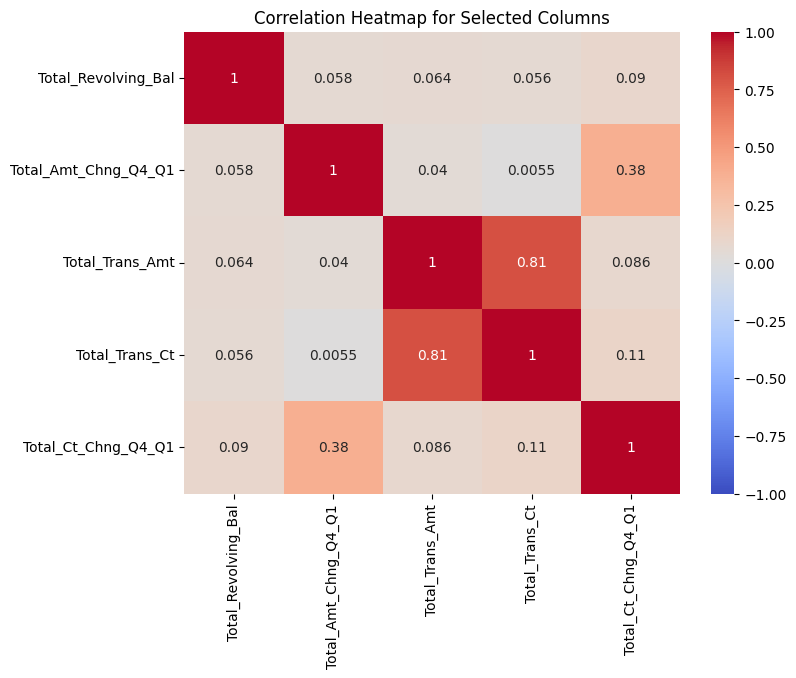

In [65]:
correlation_matrix = avg_normalized_df[columns_to_normalize].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()


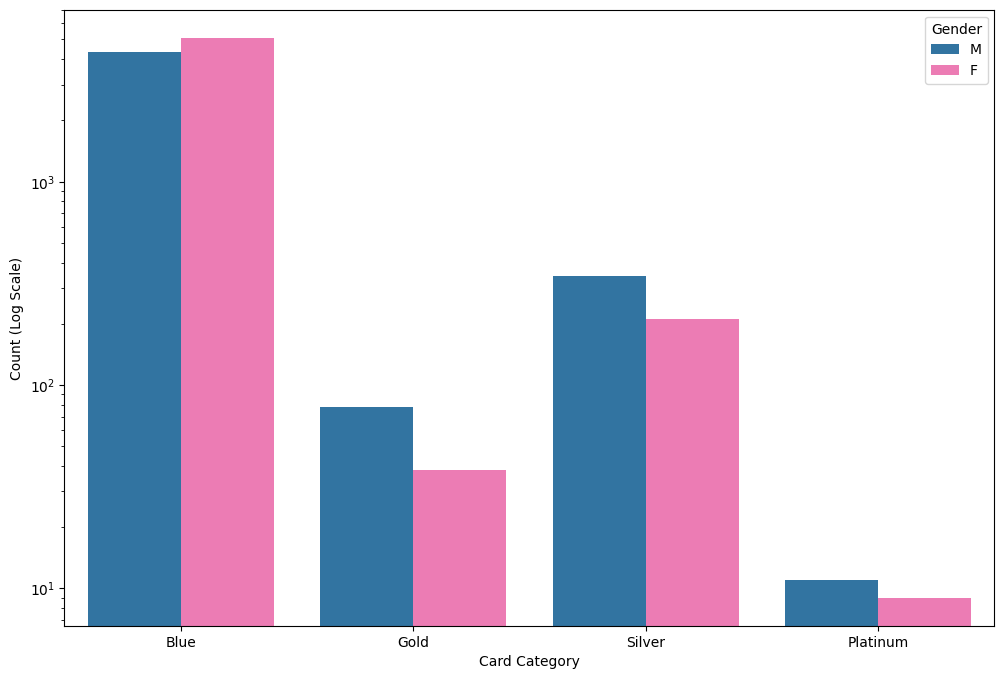

In [66]:
plt.figure(figsize=(12, 8))

sns.countplot(
    data=df,
    x='Card_Category',
    hue='Gender',
    palette={'M': '#1f77b4', 'F': '#ff69b4'},
    dodge=True
)

plt.yscale('log')

plt.xlabel('Card Category')
plt.ylabel('Count (Log Scale)')

plt.show()

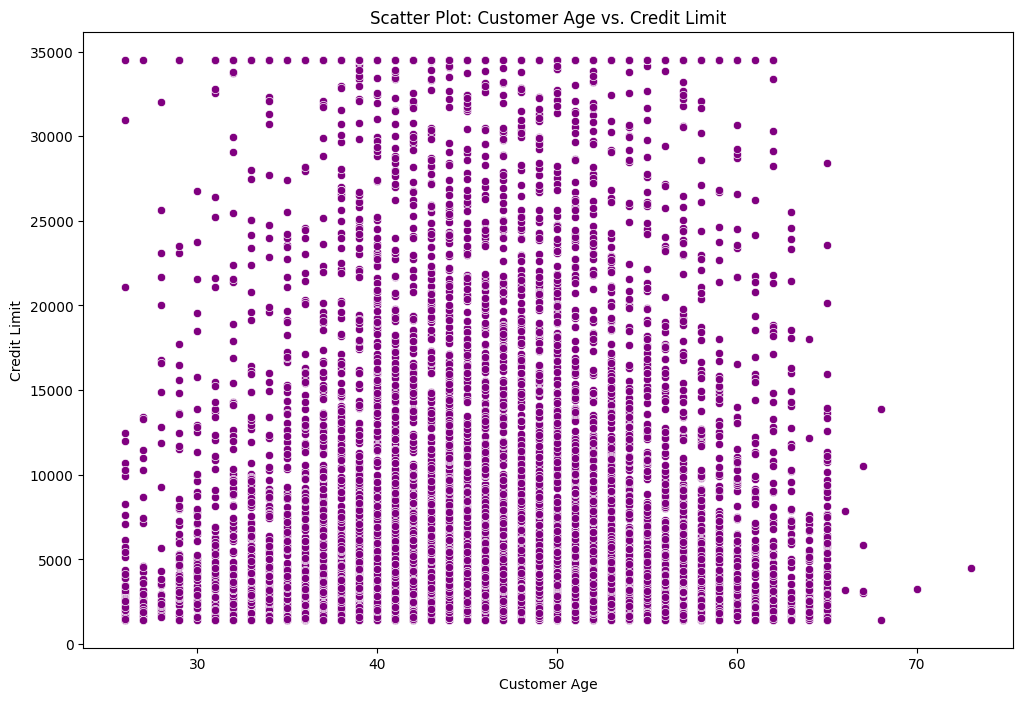

In [67]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x='Customer_Age', y='Credit_Limit', color='purple')

plt.title('Scatter Plot: Customer Age vs. Credit Limit')
plt.xlabel('Customer Age')
plt.ylabel('Credit Limit')

plt.show()